In [4]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt


In [5]:
X,Y=make_regression(n_samples=10000,n_features=20,n_informative=20,noise=10,random_state=1)

#Normalise the dataset

u=X.mean()
std=X.std()
X=(X-u)/std

In [6]:
print(X.shape,Y.shape)


(10000, 20) (10000,)


In [7]:
#Add a column for vectorisation ( x0=1)

ones=np.ones((X.shape[0],1))
X=np.hstack((ones,X))
print(X.shape,Y.shape)

(10000, 21) (10000,)


In [26]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e = 0.0
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    
    return e/X.shape[0]
    
def gradient(X,y,theta):
    
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/m

def gradient_descent(X,y,learning_rate = 0.1,max_iters=100):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        
        #Gradient descent
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list
    

In [27]:
def mini_batch_gradient_descent(X,y,batch_size=200,learning_rate=0.01,max_itrs=10):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    data=np.hstack((X,y.reshape(-1,1)))
    for i in range(max_itrs):
        e = error(X,y,theta)
        error_list.append(e)
        
        #Mini Btach Gradient descent
        np.random.shuffle(data)
        m=data.shape[0]
        total_batches=m//batch_size
        
        for i in range(total_batches):
            batch_data=data[i*batch_size:(i+1)*batch_size,:]
            
            x_batch=batch_data[:,:-1]
            y_batch=batch_data[:,-1]
            
            batch_grad=gradient(x_batch,y_batch,theta)
            theta=theta-learning_rate*batch_grad
            e = error(x_batch,y_batch,theta)
            error_list.append(e)
            
            
            
        
    return theta,error_list

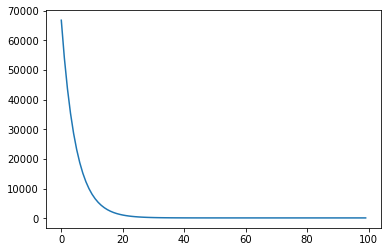

In [28]:
#batch gradient descent example

theta,errorlist=gradient_descent(X,Y)
plt.figure()
plt.plot(np.arange(len(errorlist)),errorlist)
plt.show()

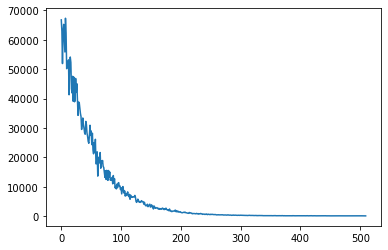

In [29]:
#Mini batch gradient descent example

mini_batch_theta,mini_batch_errorlist=mini_batch_gradient_descent(X,Y)
plt.figure()
plt.plot(np.arange(len(mini_batch_errorlist)),mini_batch_errorlist)
plt.show()

In [33]:
final_error=errorlist[-1]
print(final_error)

262.69090341929325


In [36]:
print(Y)
print(X)

[-266.04431688 -612.47413983 -152.69899814 ...  174.41140681   57.42759871
  122.254407  ]
[[ 1.          1.03022685 -1.75975454 ... -0.44265183  0.72388353
  -0.32987966]
 [ 1.         -0.8836469  -1.60280629 ... -0.28546317 -0.53825123
  -1.52472434]
 [ 1.          0.6629145  -0.08014252 ... -0.03732064 -0.44971204
   0.06654353]
 ...
 [ 1.          0.28095849  1.44410398 ... -0.82293231  1.90369036
  -0.19440283]
 [ 1.         -0.92092825 -0.81448472 ... -1.41129702  0.03619389
   0.49660872]
 [ 1.         -0.10701076 -0.84175596 ...  0.52884532 -1.43831641
  -0.80495399]]


In [30]:
mini_batch_finalerror=mini_batch_errorlist[-1]
print(mini_batch_finalerror)

86.76406293988319
